In [803]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,learning_curve, RandomizedSearchCV
from sklearn.metrics import *
from sklearn.dummy import DummyRegressor
import pickle

In [804]:
df = pd.read_csv("dataset_clear.csv")

In [805]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'cat_bmi'],
      dtype='object')

In [806]:
feature = df.columns[0:-1]
target = 'charges'
X =df.drop(["charges","bmi"],axis=1)
y = df[target]



In [807]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1337 non-null   int64 
 1   sex       1337 non-null   object
 2   children  1337 non-null   int64 
 3   smoker    1337 non-null   object
 4   region    1337 non-null   object
 5   cat_bmi   1337 non-null   object
dtypes: int64(2), object(4)
memory usage: 62.8+ KB


In [808]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, random_state=42, train_size = 0.8,stratify=X['smoker'])

In [809]:
dummy = DummyRegressor()

In [810]:
numerical_features = [
       'age','children'
       ]
categorical_features = [
       'sex' , 'smoker', 'region','cat_bmi'
       ]



In [811]:


my_col_trans = ColumnTransformer([
    ("sclal",StandardScaler(),numerical_features),
    
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore'),categorical_features),
    
])



In [812]:
X_train.head()

,age,sex,children,smoker,region,cat_bmi
367,42,female,2,no,northwest,healthy
418,64,male,1,no,southeast,obesity
938,53,male,0,no,southeast,overweight
533,37,male,0,no,southeast,obesity
354,18,female,0,no,southeast,obesity


In [813]:
dummy.fit(X_train,y_train)
dummy.score(X_train,y_train)

0.0

In [814]:
dummy.score(X_test,y_test)

-0.0010185684988295307

In [816]:
# modelElastic= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), ElasticNet(max_iter=100000,random_state=42))
# parameters = {"elasticnet__alpha":np.linspace(0.001,0.1,100),"elasticnet__l1_ratio":np.arange(0.1,1,0.1)}

# randm_src = GridSearchCV(estimator=modelElastic, param_grid=parameters,scoring='r2',cv = 5)
# randm_src.fit(X_train, y_train)



# print(randm_src.best_params_)
# best=randm_src.best_params_

In [817]:
best={'elasticnet__alpha': 0.022000000000000002, 'elasticnet__l1_ratio': 0.9}


In [818]:
modelElastic= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), ElasticNet(alpha=best['elasticnet__alpha'],l1_ratio=best['elasticnet__l1_ratio'],max_iter=100000,random_state=42))
modelElastic.fit(X_train,y_train)
modelElastic.score(X_train,y_train)


0.8585164357845938

In [819]:
modelElastic.score(X_test,y_test)

0.9147778271956678

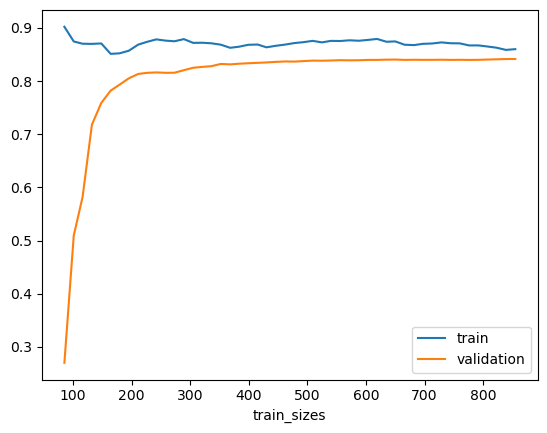

In [820]:
train_sizes, train_scores, test_scores = learning_curve(modelElastic,X_train,y_train,cv=5,train_sizes=np.linspace(0.1, 1.0, 50))                                         
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [821]:
y_pred = modelElastic.predict(X_train)

In [822]:
residual = (y_pred - y_train).abs().sort_values()

In [823]:
residual.describe()

count     1069.000000
mean      2573.224741
std       3769.242206
min          0.688009
25%        885.443737
50%       1565.575730
75%       2267.999229
max      23735.498437
Name: charges, dtype: float64

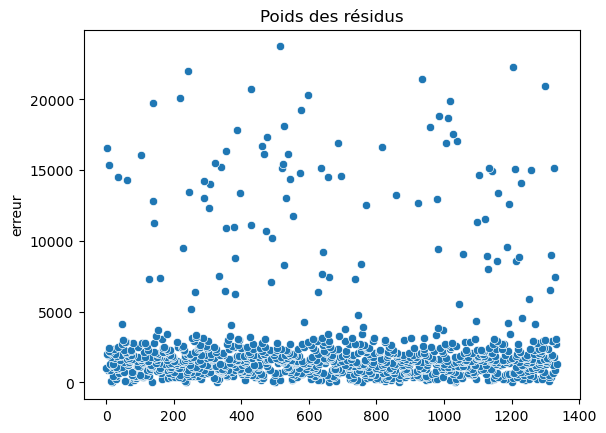

In [824]:


sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()



In [825]:
to_drop = residual[residual > 15000].index

In [826]:
X_train.loc[to_drop]

,age,sex,children,smoker,region,cat_bmi
1210,39,male,2,no,southeast,obesity
520,50,female,0,no,northeast,overweight
1133,28,male,0,no,northwest,obesity
636,35,female,2,no,northeast,obesity
1327,23,female,2,no,northeast,healthy
340,24,female,0,no,southwest,overweight
9,60,female,0,no,northwest,overweight
524,42,male,1,yes,southeast,overweight
321,26,female,4,no,northeast,overweight
102,18,female,0,no,northeast,obesity


In [827]:
y_train.loc[to_drop]

1210    23563.01618
520     25656.57526
1133    19673.33573
636     24915.04626
1327    22395.74424
340     18955.22017
9       28923.13692
524     38245.59327
321     24671.66334
102     21344.84670
468     23288.92840
539     27346.04207
355     24603.04837
3       21984.47061
818     55135.40209
461     22144.03200
1007    23241.47453
687     26236.57997
1038    22493.65964
476     35147.52848
1026    21595.38229
387     30284.64294
958     28468.91901
526     24059.68019
1011    36580.28216
986     28340.18885
577     58571.07448
140     27375.90478
1018    26018.95052
219     25081.76784
598     33471.97189
430     23082.95533
1299    62592.87309
935     32108.66282
242     35160.13457
1205    36910.60803
516     27724.28875
Name: charges, dtype: float64

In [828]:


X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)



In [829]:


modelElastic.fit(X_train,y_train)
modelElastic.score(X_train,y_train)



0.9338571437794821

In [830]:


modelElastic.score(X_test,y_test)



0.9192241724453902

In [831]:
y_pred = modelElastic.predict(X_train)

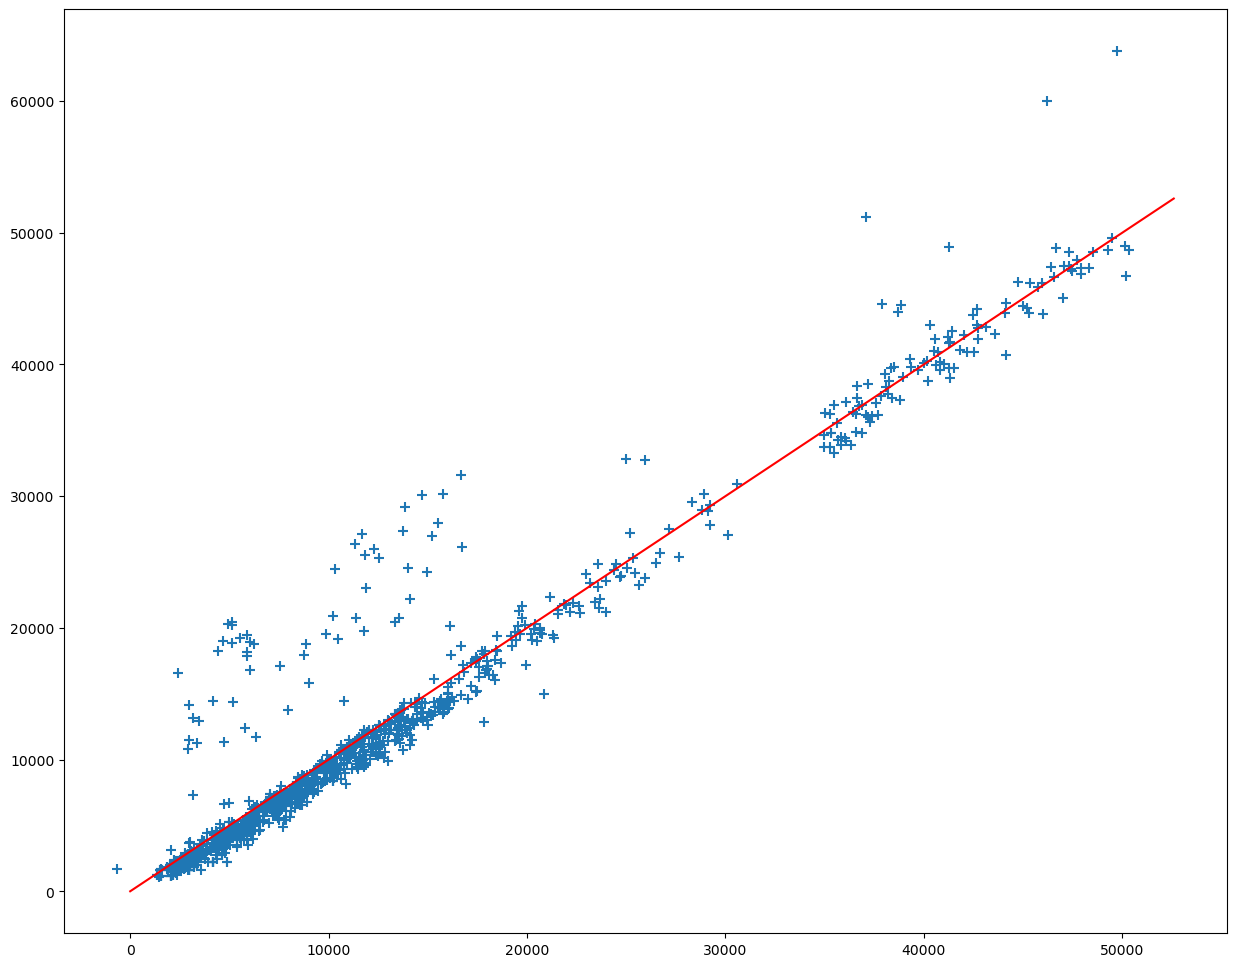

In [832]:
plt.subplots(figsize=(15, 12))
plt.scatter(y_pred,y_train,marker="+",s=50)
plt.plot(np.arange(max(y_test.values)), np.arange(max(y_test.values)), '-', color='r')
plt.show()

In [833]:
residual = (y_pred - y_train).abs().sort_values()

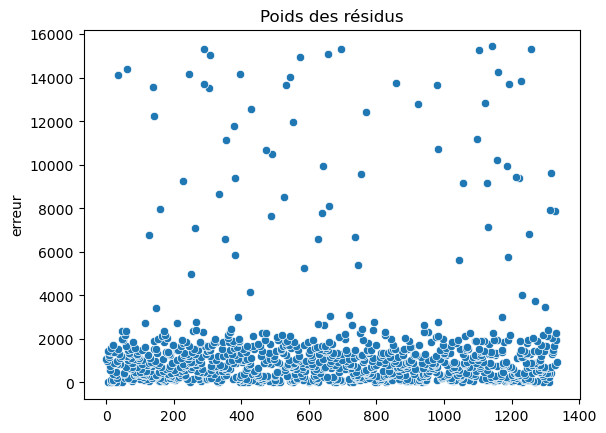

In [834]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [835]:
residual.describe()

count     1032.000000
mean      1529.113994
std       2622.499819
min          0.916012
25%        338.544469
50%        858.446346
75%       1482.383149
max      15441.919641
Name: charges, dtype: float64

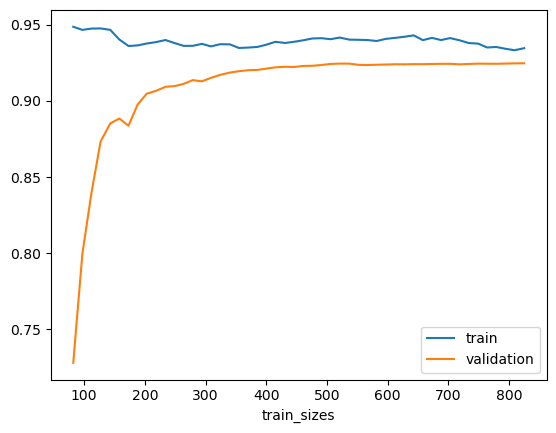

In [836]:
train_sizes, train_scores, test_scores = learning_curve(modelElastic,X_train,y_train,cv=5,train_sizes=np.linspace(0.1, 1.0, 50)) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [837]:
r2_score(modelElastic.predict(X_test),y_test)

0.912201236712065

In [838]:
pickle_out = open("modelElastic.pkl", "wb") 
pickle.dump(modelElastic, pickle_out) 
pickle_out.close()